Processing category: ALL
Processed 1 images in folder: ALL
************************
0


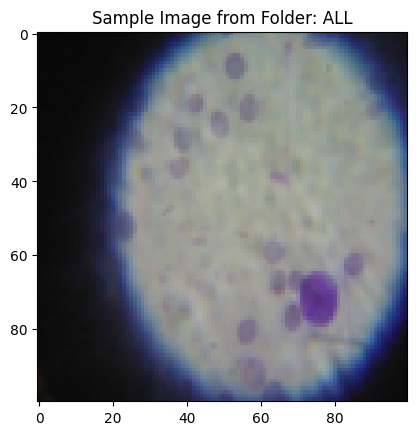

Processed 2 images in folder: ALL
************************
0
Processed 3 images in folder: ALL
************************
0
Processed 4 images in folder: ALL
************************
0
Processed 5 images in folder: ALL
************************
0
Processed 6 images in folder: ALL
************************
0
Processed 7 images in folder: ALL
************************
0
Processed 8 images in folder: ALL
************************
0
Processed 9 images in folder: ALL
************************
0
Processed 10 images in folder: ALL
************************
0
Processed 11 images in folder: ALL
************************
0
Processed 12 images in folder: ALL
************************
0
Processed 13 images in folder: ALL
************************
0
Processed 14 images in folder: ALL
************************
0
Processed 15 images in folder: ALL
************************
0
Processed 16 images in folder: ALL
************************
0
Processed 17 images in folder: ALL
************************
0
Processed 18 ima

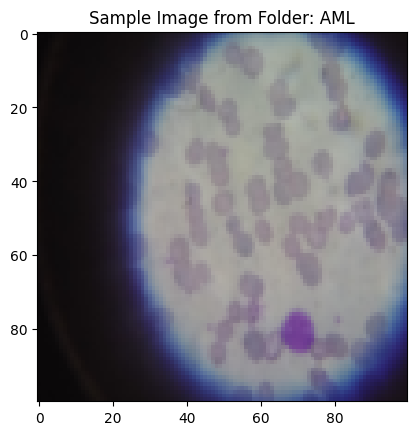

Processed 2 images in folder: AML
************************
1
Processed 3 images in folder: AML
************************
1
Processed 4 images in folder: AML
************************
1
Processed 5 images in folder: AML
************************
1
Processed 6 images in folder: AML
************************
1
Processed 7 images in folder: AML
************************
1
Processed 8 images in folder: AML
************************
1
Processed 9 images in folder: AML
************************
1
Processed 10 images in folder: AML
************************
1
Processed 11 images in folder: AML
************************
1
Processed 12 images in folder: AML
************************
1
Processed 13 images in folder: AML
************************
1
Processed 14 images in folder: AML
************************
1
Processed 15 images in folder: AML
************************
1
Processed 16 images in folder: AML
************************
1
Processed 17 images in folder: AML
************************
1
Processed 18 ima

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt

# Define the categories
Leukemia_Types = ['ALL', 'AML', 'CLL', 'CML']

# Specify the directory where your image subfolders are located
datadir = './tipos_leucemia'  # Update with the correct directory path

flat_data_arr = []  # Define an empty list to store flattened image data
target_arr = []  # Define an empty list to store target labels

# Specify the target image size (e.g., 100x100 pixels)
target_image_size = (100, 100, 3)

# Define the number of samples to use
num_samples_per_type = 200  # Adjust this number based on available memory

for leukemia_type in Leukemia_Types:
    print(f"Processing category: {leukemia_type}")
    path = os.path.join(datadir, leukemia_type)  # Define the folder path for the current leukemia type
    counter = 0  # Reset the counter for each category
    for img in os.listdir(path):
        if counter >= num_samples_per_type:
            break

        counter += 1
        print(f"Processed {counter} images in folder: {leukemia_type}")
        img_array = imread(os.path.join(path, img))  # Load the image as a NumPy array
        img_resized = resize(img_array, target_image_size)  # Resize the image
        flat_data_arr.append(img_resized.flatten())  # Flatten the image and add it to the list
        target_arr.append(Leukemia_Types.index(leukemia_type))  # Add the category index to target_arr
        
        print("************************")
        print(Leukemia_Types.index(leukemia_type))
        # Show one image using Matplotlib
        if counter == 1:
            plt.imshow(img_resized)
            plt.title(f"Sample Image from Folder: {leukemia_type}")
            plt.show()

# Create NumPy arrays from the lists
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Create a DataFrame
df = pd.DataFrame(flat_data)
df['Target'] = target
print(df.head(5))

# Split the data into training and testing sets
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=77, stratify=y)

# SVM model training
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.1, 1],
    'kernel': ['rbf', 'poly']
}

svc = svm.SVC(probability=True)
print("Training the model. Please wait; it may take a few minutes to complete.")

model = GridSearchCV(svc, param_grid)
model.fit(x_train, y_train)

print('The model is trained successfully with the given images.')
print("Best hyperparameters:", model.best_params_)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy * 100}% accurate.")

# Save the trained model to a Pickle file
pickle.dump(model, open('leukemia_model.pkl', 'wb'))
print("Pickle is dumped successfully")
